# Week 3 Homework

## Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

In [1]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

We'll keep working with the `median_house_value` variable, and we'll transform it to a classification task.

#### Features
For the rest of the homework, you'll need to use only these columns:

- `latitude`,
- `longitude`,
- `housing_median_age`,
- `total_rooms`,
- `total_bedrooms`,
- `population`,
- `households`,
- `median_income`,
- `median_house_value`,
- `ocean_proximity`,

#### Data preparation
- Select only the features from above and fill in the missing values with 0.
- Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
- Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
- Create a new column `population_per_household` by dividing the column population by the column `households` from dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.shape

(20640, 10)

In [5]:
cols = list(df.columns)
cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [11]:
df["ocean_proximity"].mode()

0    <1H OCEAN
dtype: object

### Question 2
- Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?


In [12]:
df.select_dtypes(include="number").corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


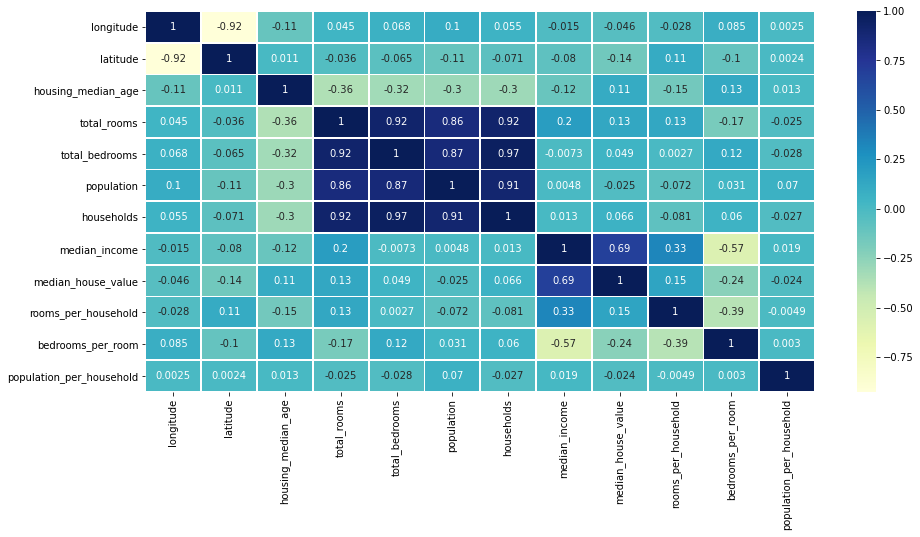

In [13]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=0.8);

In [14]:
df.select_dtypes(include="number").corr().unstack().sort_values(ascending=False).drop_duplicates()

population_per_household  population_per_household    1.000000
households                total_bedrooms              0.966507
total_bedrooms            total_rooms                 0.920196
households                total_rooms                 0.918484
                          population                  0.907222
                                                        ...   
housing_median_age        total_bedrooms             -0.317063
total_rooms               housing_median_age         -0.361262
rooms_per_household       bedrooms_per_room          -0.387465
bedrooms_per_room         median_income              -0.573836
latitude                  longitude                  -0.924664
Length: 67, dtype: float64

### Make median_house_value binary
- We need to turn the `median_house_value` variable from numeric into `binary`.
- Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and 0 otherwise.


In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [16]:
df["above_average"] = (df["median_house_value"] > df["median_house_value"].mean()).astype("int")

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


### Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
- Make sure that the target value (`median_house_value`) is not in your dataframe.

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
len(df_train), len(df_val), len(df_val)

(12384, 4128, 4128)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [22]:
drop_cols = ["median_house_value", "above_average"]
df_train.drop(drop_cols, inplace=True, axis=1)
df_val.drop(drop_cols, inplace=True, axis=1)
df_test.drop(drop_cols, inplace=True, axis=1)

In [23]:
list(df_train.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

### Question 3
- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using `round(score, 2)`

In [24]:
numerical = list(df_train.select_dtypes(include="number").columns)
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [25]:
categorical = list(df_train.select_dtypes(include="object").columns)
categorical

['ocean_proximity']

In [26]:
mi_score = mutual_info_score(df_full_train["ocean_proximity"], df_full_train["above_average"])
mi_score = round(mi_score, 2)
mi_score

0.1

### Question 4
- Now let's train a logistic regression
- Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [27]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [28]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
# train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [29]:
model.intercept_[0]

-0.08715392522028845

In [30]:
model.coef_[0].round(3)

array([ 0.191,  0.004,  0.036,  0.122,  0.089,  1.216,  0.478, -1.749,
        0.02 ,  0.29 ,  0.874, -0.002,  0.01 , -0.016,  0.002, -0.   ])

In [31]:
# accuracy on the validation dataset
y_pred_val = model.predict(X_val)
y_pred_val

array([0, 0, 1, ..., 1, 1, 0])

In [32]:
y_pred_prob = model.predict_proba(X_val)[:, 1]
y_pred_prob

array([0.07669548, 0.18125552, 0.95259747, ..., 0.96199941, 0.85205078,
       0.47212173])

In [33]:
decision = (y_pred_prob >= 0.5)
decision

array([False, False,  True, ...,  True,  True, False])

In [34]:
decision.astype("int")

array([0, 0, 1, ..., 1, 1, 0])

In [35]:
score = round((y_val == decision).mean(), 2)
score

0.84

In [36]:
score = round(model.score(X_val, y_val), 2)
score

0.84

### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - `total_rooms`
    - `total_bedrooms`
    - `population`
    - `households`

> note: the difference doesn't have to be positive

In [37]:
features = numerical + categorical
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity']

In [38]:
feature_diff_scores = []

for feature in features:
    df_train_new = df_train.drop(feature, axis=1)
    df_val_new = df_val.drop(feature, axis=1)
    
    train_dict = df_train_new.to_dict(orient="records")
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_new.to_dict(orient="records")
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    # train the model
    model.fit(X_train, y_train)

    new_score = round(model.score(X_val, y_val), 2)
    score_diff = round(score - new_score, 2)
    feature_diff_scores.append((feature, score_diff))

In [39]:
feature_diff_scores

[('longitude', 0.01),
 ('latitude', 0.01),
 ('housing_median_age', 0.01),
 ('total_rooms', 0.0),
 ('total_bedrooms', 0.0),
 ('population', 0.01),
 ('households', 0.0),
 ('median_income', 0.05),
 ('rooms_per_household', 0.01),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0),
 ('ocean_proximity', 0.02)]

In [40]:
feature_diff_scores = sorted(feature_diff_scores, key=lambda x: x[1])
feature_diff_scores

[('total_rooms', 0.0),
 ('total_bedrooms', 0.0),
 ('households', 0.0),
 ('bedrooms_per_room', 0.0),
 ('population_per_household', 0.0),
 ('longitude', 0.01),
 ('latitude', 0.01),
 ('housing_median_age', 0.01),
 ('population', 0.01),
 ('rooms_per_household', 0.01),
 ('ocean_proximity', 0.02),
 ('median_income', 0.05)]

### Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model `(model = Ridge(alpha=a, solver="sag", random_state=42))` on the training data.
- This model has a parameter alpha. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alph

In [41]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


In [42]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

drop_cols = ["median_house_value", "above_average"]
df_train.drop(drop_cols, inplace=True, axis=1)
df_val.drop(drop_cols, inplace=True, axis=1)
df_test.drop(drop_cols, inplace=True, axis=1)

In [43]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [44]:
alpha_params = [0, 0.01, 0.1, 1, 10]
rmse_scores = []
for alpha in alpha_params:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2) / len(X_val)).round(3)
    rmse_scores.append((alpha, rmse))

In [45]:
rmse_scores = sorted(rmse_scores, key=lambda x: x[1])
rmse_scores

[(0, 0.008), (0.01, 0.008), (0.1, 0.008), (1, 0.008), (10, 0.008)]